In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import itertools
import os

from sklearn.metrics import confusion_matrix

# just a preference
color_map = plt.cm.Greys

In [2]:
def plot_confusion_matrix(cm, class_labels, filename, cmap=color_map):
    # consistency
    fontsize = 16
    
    # create the figure
    fig = plt.figure()
    fig.set_size_inches(20,16)
    
    # labels
    plt.ylabel("True label", fontsize=fontsize)
    plt.xlabel("Predicted label", fontsize=fontsize)
    
    # tick marks
    class_count = len(class_labels)
    tick_marks = np.arange(class_count + 1)
    plt.xticks(tick_marks, class_labels, rotation=45, fontsize=fontsize)
    plt.yticks(tick_marks, class_labels, fontsize = fontsize)
    
    # numbers
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            "{:.1f}".format(cm[i,j]),
            horizontalalignment = "center",
            color = "white" if cm[i,j] > thresh else "black",
            fontsize = fontsize)
    
    # color bar
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    
    # save and show
    np.set_printoptions(formatter={"float": lambda x: "{0:0.1f}".format(x)})
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
    plt.show(block=False)

In [3]:
def plot_confusion_matrices(cm1, cm2, class_labels, filename, cmap=color_map):
    # consistency
    fontsize = 16
    
    # create the figure
    fig, axes = plt.subplots(2, 1, figsize=(20, 32))
    
    # tick marks
    class_count = len(class_labels)
    tick_marks = np.arange(class_count + 1)
    
    # numbers
    for idx, cm in enumerate([cm1, cm2]):
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            axes[idx].text(
                j,
                i,
                "{:.1f}".format(cm[i,j]),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black",
                fontsize = fontsize)
    
    # pretty-fy
    for ax in axes:
        ax.set_ylabel("True label", fontsize=fontsize)
        ax.set_xlabel("Predicted label", fontsize=fontsize)
        
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(class_labels, rotation=45, fontsize=fontsize)
        
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(class_labels, fontsize=fontsize)
        
        ax.imshow(cm, interpolation="nearest", cmap=cmap)
    
    # save and show
    np.set_printoptions(formatter={"float": lambda x: "{0:0.1f}".format(x)})
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
    plt.show(block=False)

In [4]:
def plot_confusion_matrices(cm1, cm2, cm3, cm4, class_labels, filename, cmap=color_map):
    # consistency
    fontsize = 16
    
    # create the figure
    fig, axes = plt.subplots(2, 2, figsize=(40, 32))
    axes = axes.flatten()
    
    # tick marks
    class_count = len(class_labels)
    tick_marks = np.arange(class_count + 1)
    
    # pretty-fy
    for ax in axes:
        ax.set_ylabel("True label", fontsize=fontsize)
        ax.set_xlabel("Predicted label", fontsize=fontsize)
        
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(class_labels, rotation=45, fontsize=fontsize)
        
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(class_labels, fontsize=fontsize)
    
    # numbers
    for idx, cm in enumerate([cm1, cm2, cm3, cm4]):
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            axes[idx].text(
                j,
                i,
                "{:.1f}".format(cm[i,j]),
                horizontalalignment = "center",
                color = "white" if cm[i,j] > thresh else "black",
                fontsize = fontsize)
    
        axes[idx].imshow(cm, interpolation="nearest", cmap=cmap)
    
    # save and show
    np.set_printoptions(formatter={"float": lambda x: "{0:0.1f}".format(x)})
    fig.subplots_adjust(hspace=0.1, wspace=-0.325)
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.05)
    plt.show(block=False)

In [5]:
labels = {}

# adjust the labels
for i in range(9):
    labels[i] = i + 1
for i in range(11):
    labels[i + 9] = 100 + i + 1

In [6]:
# read confusion matrices
mlp_balanced = np.loadtxt(
    os.path.join(os.getcwd(), "basic-model", "stats", "final_model_balanced_confusion_matrix.txt"), 
    delimiter=",")

mlp_imbalanced = np.loadtxt(
    os.path.join(os.getcwd(), "basic-model", "stats", "final_model_all_confusion_matrix.txt"), 
    delimiter=",")

cnn_balanced = np.loadtxt(
    os.path.join(os.getcwd(), "stats", "final_model_balanced_confusion_matrix.txt"), 
    delimiter=",")

cnn_imbalanced = np.loadtxt(
    os.path.join(os.getcwd(), "stats", "final_model_all_confusion_matrix.txt"), 
    delimiter=",")

# scale up to percentages
mlp_balanced *= 100
mlp_imbalanced *= 100
cnn_balanced *= 100
cnn_imbalanced *= 100

In [7]:
for s in [mlp_imbalanced, mlp_balanced, cnn_imbalanced, cnn_balanced]:
    off = []
    
    for i in range(len(s)):
        for j in range(len(s[i])):
            if i != j:
                off.append(s[i][j])

    off = np.sort(off)[::-1]
    print(off[:3])

[21.4067 12.8641 12.012 ]
[21.0989 14.2487 12.7517]
[11.1765  8.05    7.8189]
[15.1899 13.5294 11.9874]


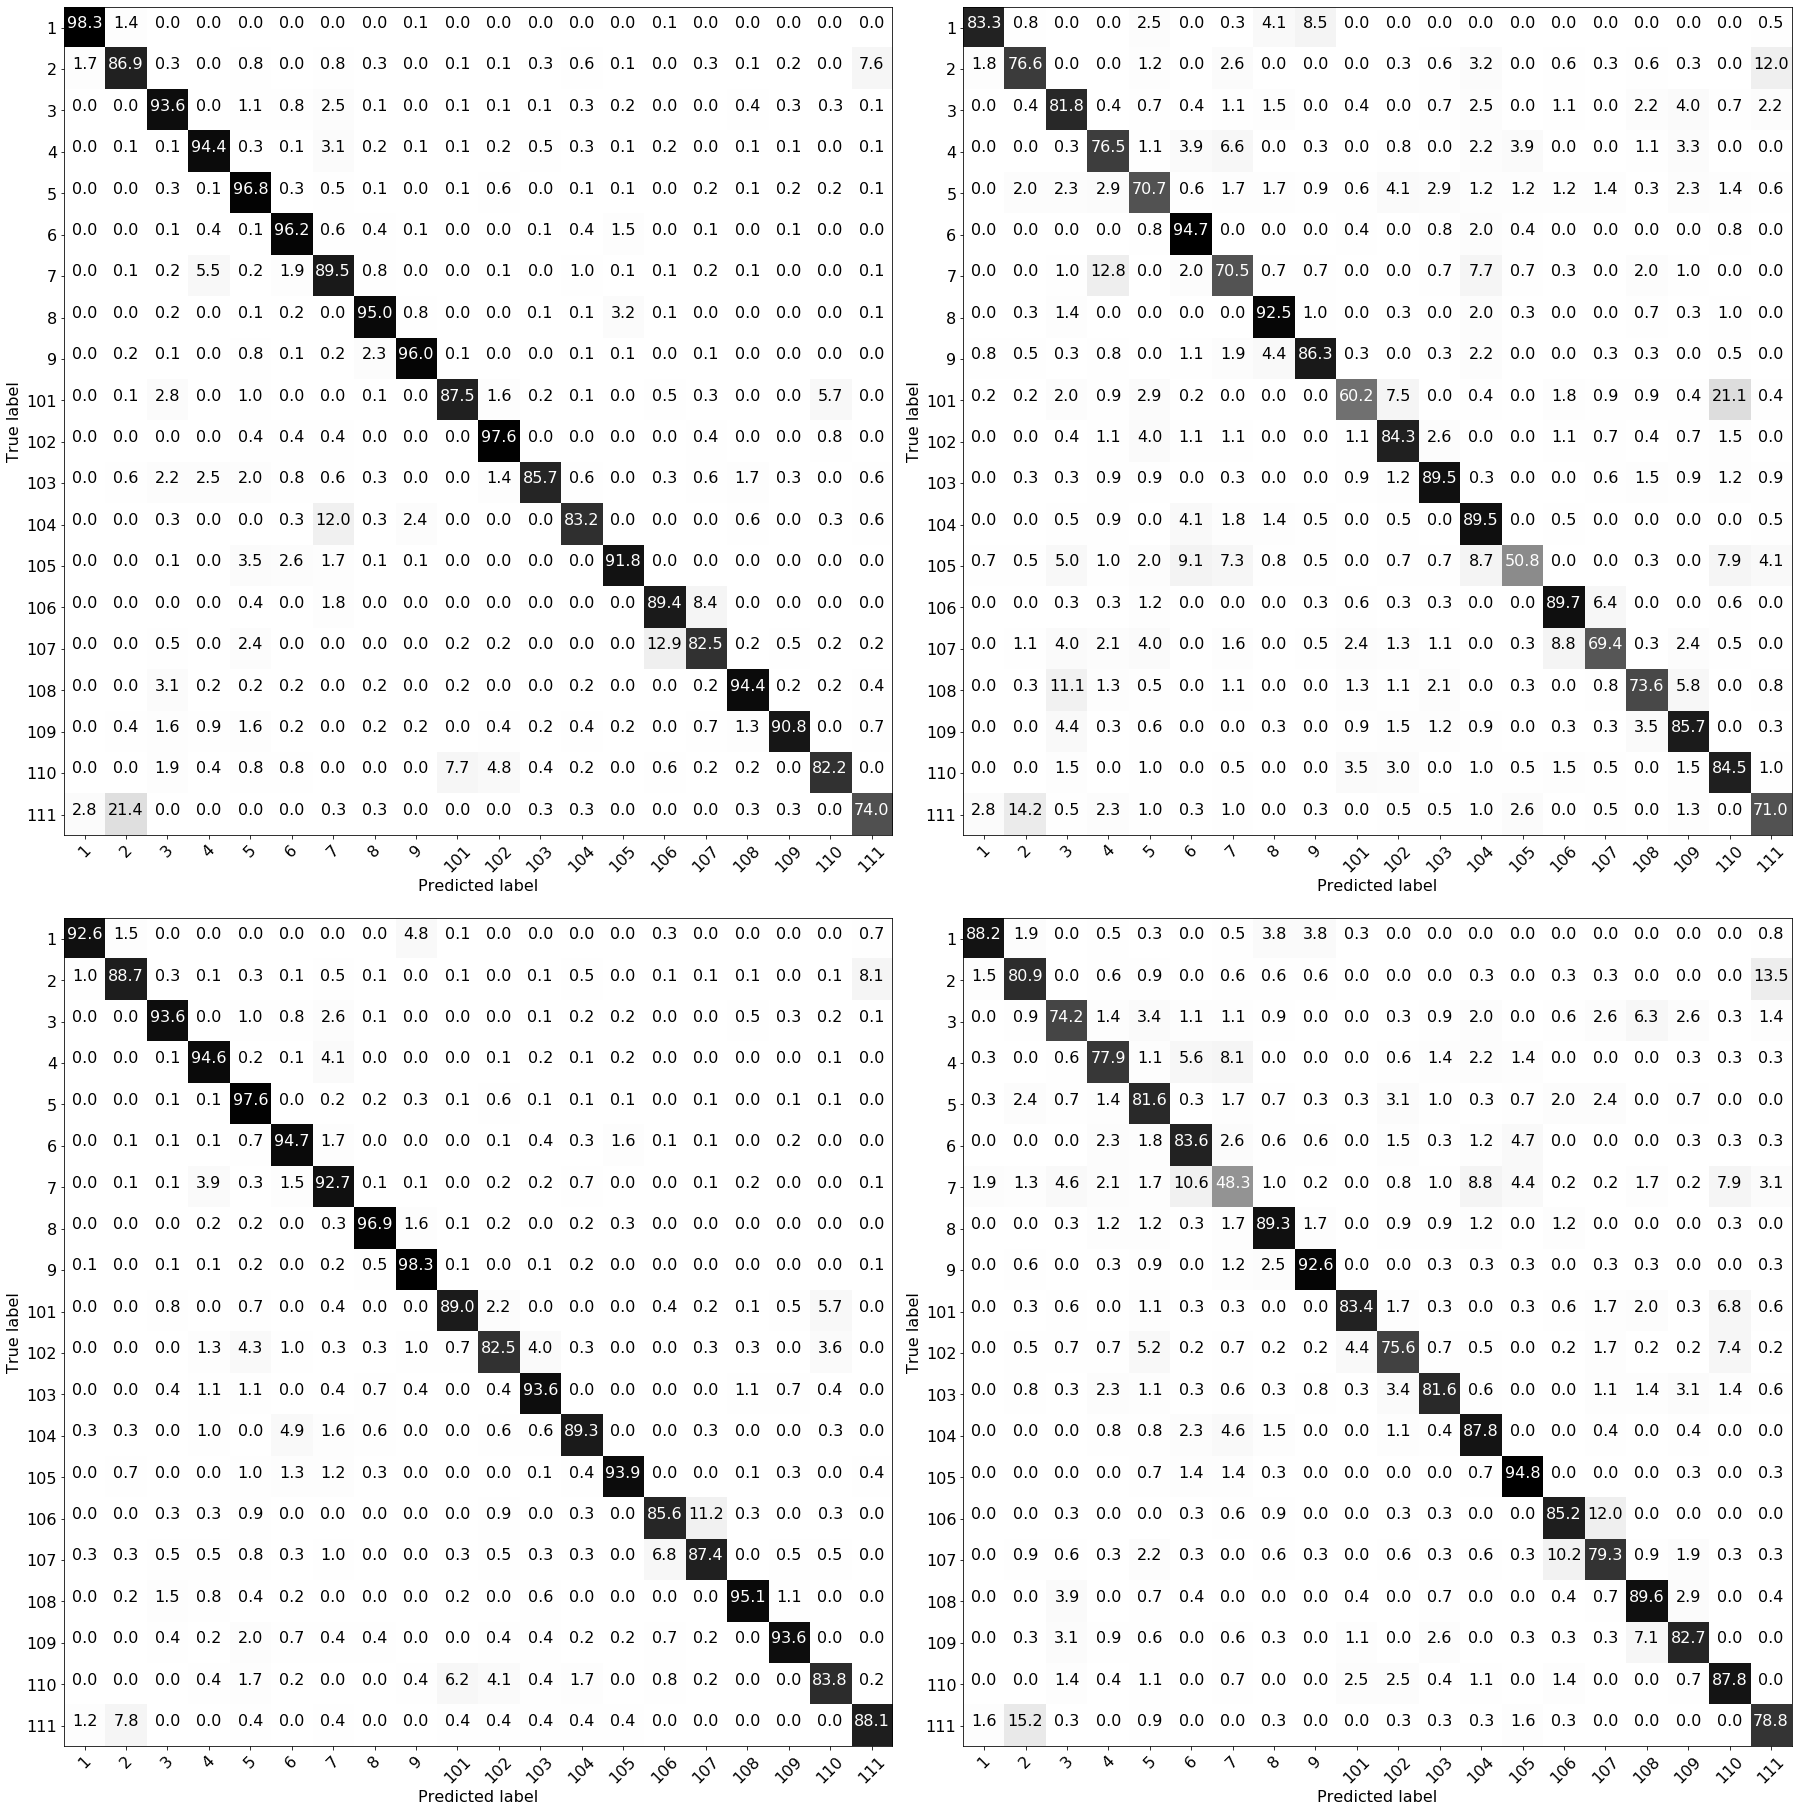

In [8]:
directory = os.path.join(os.getcwd(), "..", "report", "images")
plot_confusion_matrices(mlp_imbalanced, mlp_balanced, cnn_imbalanced, cnn_balanced,
                        labels.values(), os.path.join(directory, "matrix.png"))

In [9]:
results = np.hstack((
    np.diag(mlp_imbalanced).reshape(-1,1),
    np.diag(mlp_balanced).reshape(-1,1),
    np.diag(cnn_imbalanced).reshape(-1,1),
    np.diag(cnn_balanced).reshape(-1,1)
))

df = pd.DataFrame(
    results,
    columns = ["MLP Imbalanced", "MLP Balanced", "CNN Imbalanced", "CNN Balanced"],
    index = labels.values()
)

display(df)

,MLP Imbalanced,MLP Balanced,CNN Imbalanced,CNN Balanced
1,98.3133,83.2877,92.5764,88.2038
2,86.8875,76.6082,88.6884,80.8824
3,93.5882,81.8182,93.5985,74.2120
4,94.3961,76.5193,94.5506,77.8711
5,96.8466,70.7246,97.5642,81.5700
6,96.2049,94.7154,94.7183,83.6257
7,89.4959,70.4698,92.7149,48.2692
8,94.9889,92.4915,96.8520,89.3372
9,96.0293,86.2637,98.3374,92.6380
101,87.5433,60.2198,88.9952,83.3803


In [10]:
# for each vehicle...
for vehicle, row in df.iterrows():
    items = [str(vehicle)]
    
    # accuracies
    for i in row:
        item = "{:.2f}".format(i)
        
        if i == np.max(row):
            item = "\\cellcolor{grey}" + item
        
        items.append(item + " \\%")
    
    # median accuracy
    items.append("{:.2f}".format(np.median(row)))
    
    # latex table row
    print(" & ".join(items), "\\\\")

1 & \cellcolor{grey}98.31 \% & 83.29 \% & 92.58 \% & 88.20 \% & 90.39 \\
2 & 86.89 \% & 76.61 \% & \cellcolor{grey}88.69 \% & 80.88 \% & 83.88 \\
3 & 93.59 \% & 81.82 \% & \cellcolor{grey}93.60 \% & 74.21 \% & 87.70 \\
4 & 94.40 \% & 76.52 \% & \cellcolor{grey}94.55 \% & 77.87 \% & 86.13 \\
5 & 96.85 \% & 70.72 \% & \cellcolor{grey}97.56 \% & 81.57 \% & 89.21 \\
6 & \cellcolor{grey}96.20 \% & 94.72 \% & 94.72 \% & 83.63 \% & 94.72 \\
7 & 89.50 \% & 70.47 \% & \cellcolor{grey}92.71 \% & 48.27 \% & 79.98 \\
8 & 94.99 \% & 92.49 \% & \cellcolor{grey}96.85 \% & 89.34 \% & 93.74 \\
9 & 96.03 \% & 86.26 \% & \cellcolor{grey}98.34 \% & 92.64 \% & 94.33 \\
101 & 87.54 \% & 60.22 \% & \cellcolor{grey}89.00 \% & 83.38 \% & 85.46 \\
102 & \cellcolor{grey}97.63 \% & 84.31 \% & 82.51 \% & 75.56 \% & 83.41 \\
103 & 85.67 \% & 89.51 \% & \cellcolor{grey}93.57 \% & 81.59 \% & 87.59 \\
104 & 83.18 \% & \cellcolor{grey}89.55 \% & 89.29 \% & 87.83 \% & 88.56 \\
105 & 91.80 \% & 50.83 \% & 93.94 \% & \cel